<a href="https://colab.research.google.com/github/roy2392/breast_cancer_classification/blob/main/Breast_Cancer_Classification_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

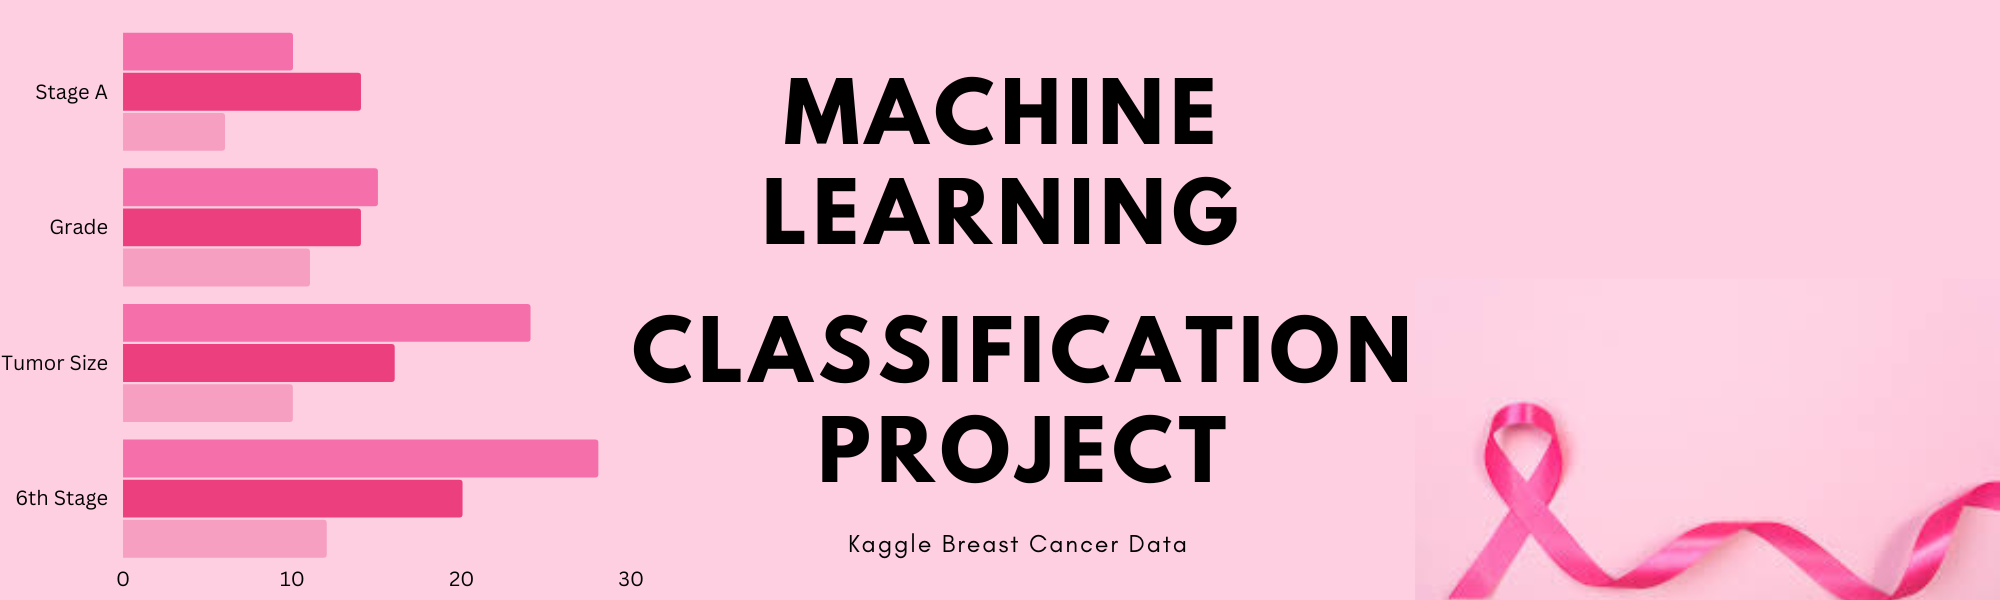

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# importing & merging the data

In [9]:
#import Kaggle API
# %pip install kaggle

In [10]:
#in case of using google colab
# #upload you kaggle api token (under profil >> settings >> API >> Create nEW Token) 
# from google.colab import files

# uploaded = files.upload()

In [11]:
#import the  dataset from kaggle via api
# !kaggle datasets download -d reihanenamdari/breast-cancer

In [12]:
#unzip the dataset zip file 
# !unzip breast-cancer.zip

In [13]:
df = pd.read_csv('Breast_Cancer.csv')

# Visualization of the data


## All features Histograms

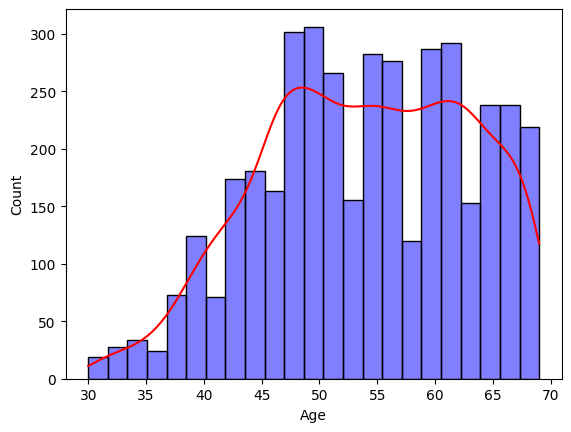

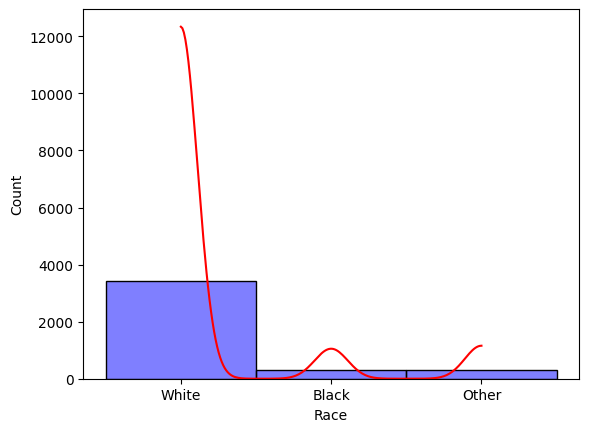

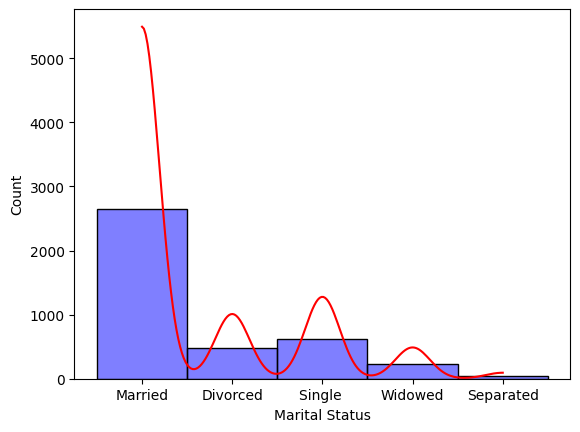

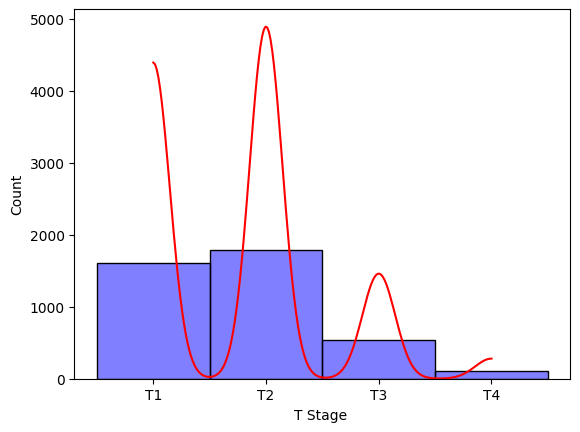

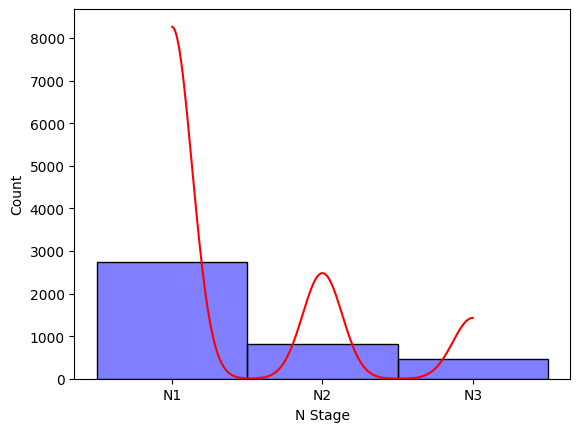

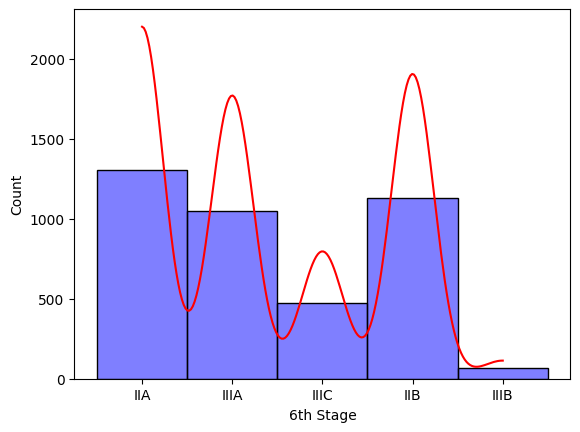

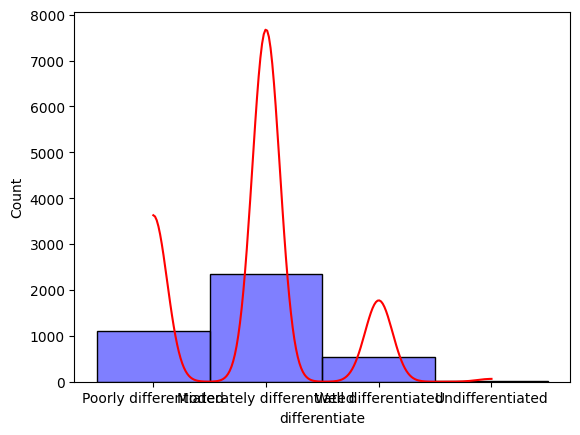

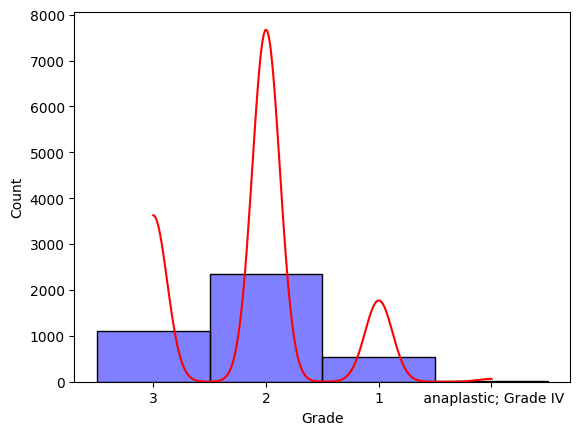

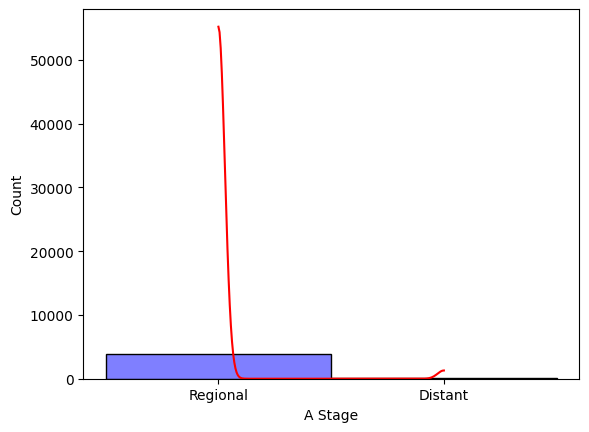

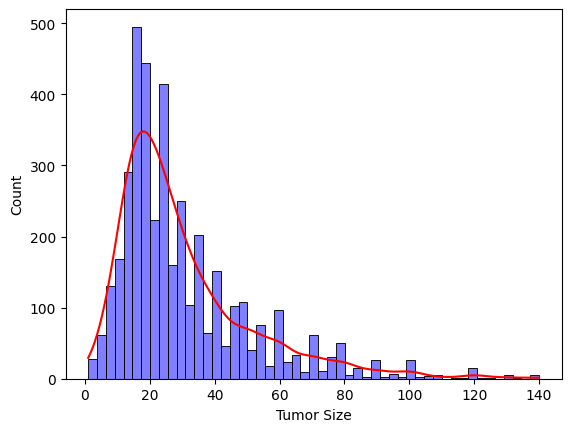

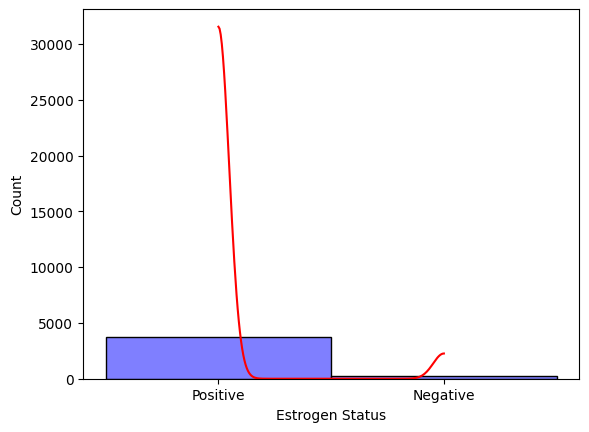

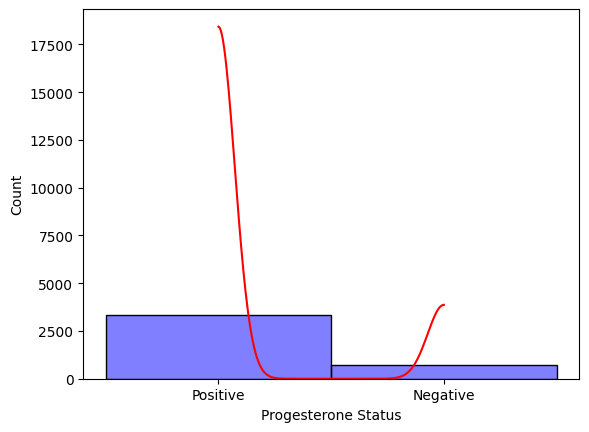

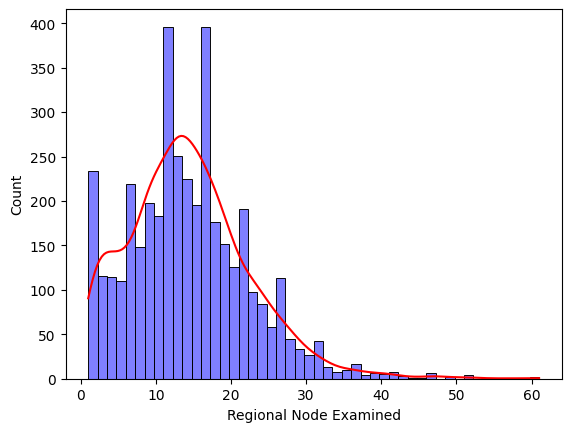

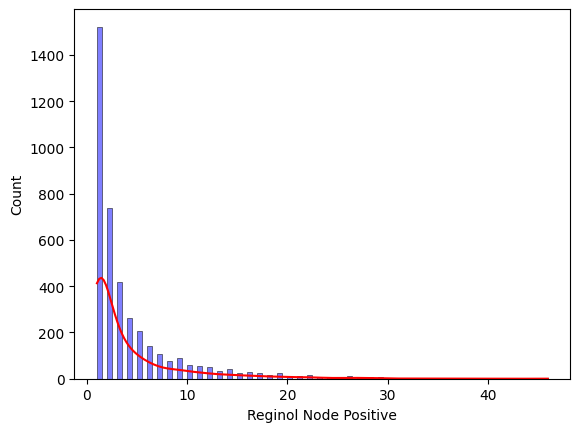

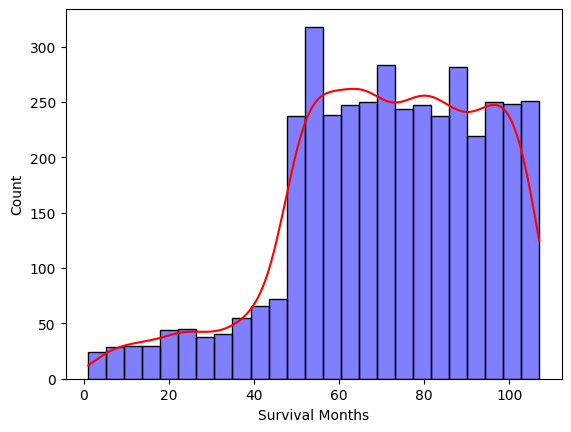

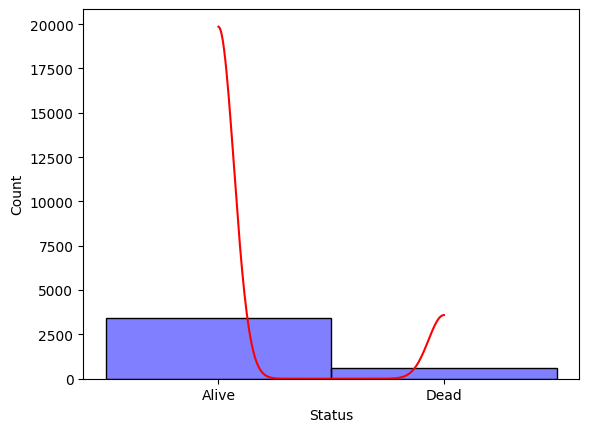

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns:
    ax = sns.histplot(df, x = i, kde = True, color = "blue")
    ax.lines[0].set_color("red")
    plt.show()

## Features Corrleations

In [21]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr().round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
Age,1.000000,-0.080000,-0.030000,0.010000,-0.010000
Tumor Size,-0.080000,1.000000,0.100000,0.240000,-0.090000
Regional Node Examined,-0.030000,0.100000,1.000000,0.410000,-0.020000
Reginol Node Positive,0.010000,0.240000,0.410000,1.000000,-0.140000
Survival Months,-0.010000,-0.090000,-0.020000,-0.140000,1.000000


<span style="color:green">It doesnt seem like there's any significant correlation in the numberical features </span>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [22]:
for i in df.columns: print(i, "  ",df[i].unique())

Age    [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30]
Race    ['White' 'Black' 'Other']
Marital Status    ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage     ['T1' 'T2' 'T3' 'T4']
N Stage    ['N1' 'N2' 'N3']
6th Stage    ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate    ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade    ['3' '2' '1' ' anaplastic; Grade IV']
A Stage    ['Regional' 'Distant']
Tumor Size    [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  6

## Convert Categorical features to numbrical 


<span style="color:green">categorical variable: Status,Estrogen Status,Progesterone Status,T Stage,N Stage,6th Stage,differentiate,Grade,Race.
 </span>

In [23]:
data_encoder = preprocessing.OrdinalEncoder(categories = [['T1','T2','T3','T4'],['N1','N2','N3'],['IIA','IIB','IIIA','IIIB','IIIC'],
                                                         ['1','2','3',' anaplastic; Grade IV'],['Regional','Distant'],
                                                         ['Negative','Positive'],['Negative','Positive'],['Alive','Dead']])


In [24]:
df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']] = data_encoder.fit_transform(df[['T Stage ','N Stage','6th Stage','Grade','A Stage','Estrogen Status','Progesterone Status','Status']].values.reshape(-8, 8))

In [25]:
df.Grade = df.Grade+1

## Convert categorical data into binary features 

In [26]:
from sklearn.preprocessing import OneHotEncoder
cat_var = ['Race','Marital Status']
one_hot = OneHotEncoder(sparse=False)#, drop = 'first')
encoder_var_array = one_hot.fit_transform(df[cat_var])
encoder_name = one_hot.get_feature_names_out(cat_var)
encoder_vars_df = pd.DataFrame(encoder_var_array,columns=encoder_name)
df = pd.concat([df,encoder_vars_df],axis=1)
#df.drop(cat_var,axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
data_encoder.categories_

[array(['T1', 'T2', 'T3', 'T4'], dtype=object),
 array(['N1', 'N2', 'N3'], dtype=object),
 array(['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'], dtype=object),
 array(['1', '2', '3', ' anaplastic; Grade IV'], dtype=object),
 array(['Regional', 'Distant'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Negative', 'Positive'], dtype=object),
 array(['Alive', 'Dead'], dtype=object)]

## Correlation - Again

In [ ]:
corr_matrix = df.corr()[['Grade','A Stage']].round(2)
corr_matrix_styled = corr_matrix.style.background_gradient()
corr_matrix_styled

,Grade,A Stage
Age,-0.100000,-0.020000
T Stage,0.130000,0.220000
N Stage,0.160000,0.260000
6th Stage,0.190000,0.290000
Grade,1.000000,0.040000
A Stage,0.040000,1.000000
Tumor Size,0.120000,0.120000
Estrogen Status,-0.210000,-0.070000
Progesterone Status,-0.180000,-0.030000
Regional Node Examined,0.080000,0.070000



<span style="color:green">now we can analyze correlation with the categorial features as well. It still doesnt show any significant correlation
 </span>


<span style="color:green">after converting the grade to numberical values, lets examine the distribution
 </span>

<Axes: xlabel='Grade'>

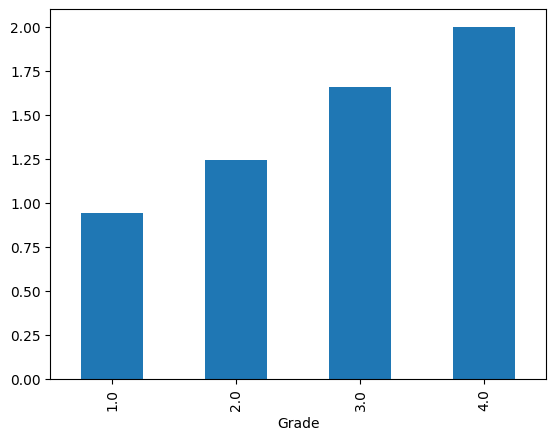

In [30]:
df.groupby(['Grade'])['6th Stage'].mean().plot.bar()

<AxesSubplot:xlabel='A Stage'>

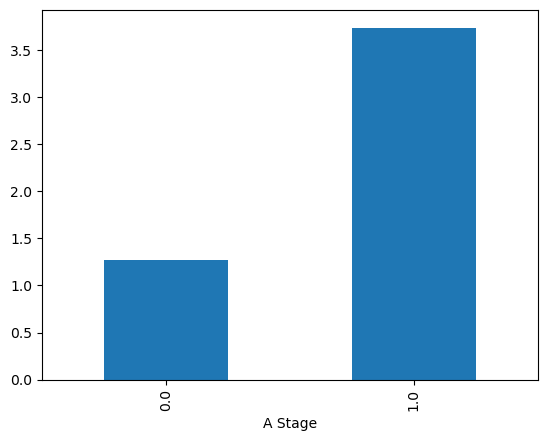

In [ ]:
df.groupby(['A Stage'])['6th Stage'].mean().plot.bar()

<AxesSubplot:>

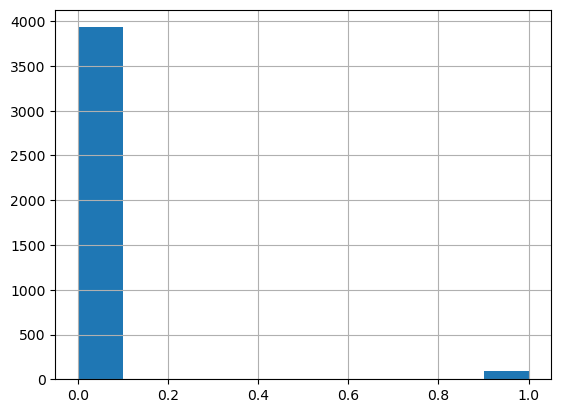

In [ ]:
df['A Stage'].hist()

<AxesSubplot:>

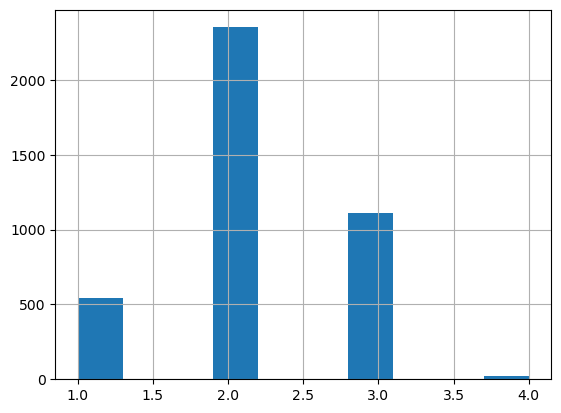

In [ ]:
df.Grade.hist()

<Axes: title={'center': '6th Stage'}, xlabel='Grade'>

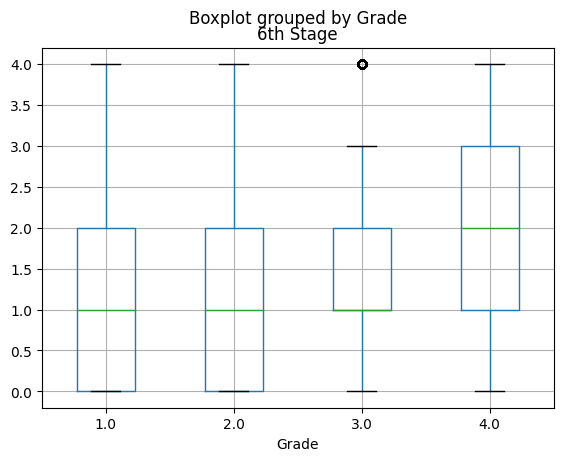

In [32]:
df.boxplot('6th Stage','Grade')


# race and a stage and Grade

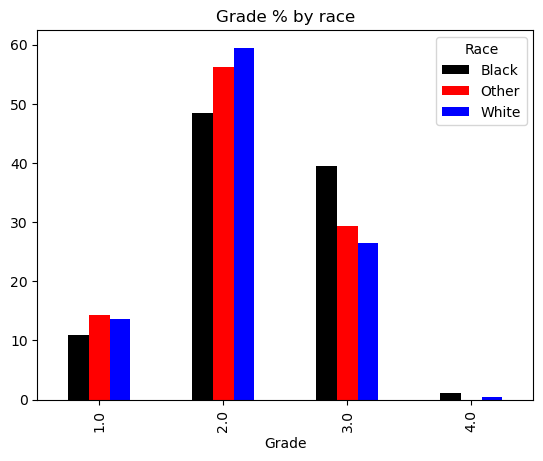

In [ ]:
df.groupby(['Grade','Race'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar(color = ('black','red',"blue"))
plt.title(label='Grade % by race', fontsize=12)
plt.show()

<span style="color:green"> While white people have more patients in grade 2, black people have more patient in grade 3 </span>

<span style="color:green"> <b> we assume, white people are more likely to been examined in early stages and that's why there are more white females in stage 2
according to the Breast Cancer Foundation by Susan G Komen, "mong younger women, Black and non-Hispanic Black women have higher rates of breast cancer compared to white and non-Hispanic white women." </b>  </span>

link: https://www.komen.org/breast-cancer/risk-factor/race-ethnicity/#:~:text=Rates%20of%20breast%20cancer%20in,2.3%20below)%20%5B333%5D.

## what is the distribution of women pateints for each race?

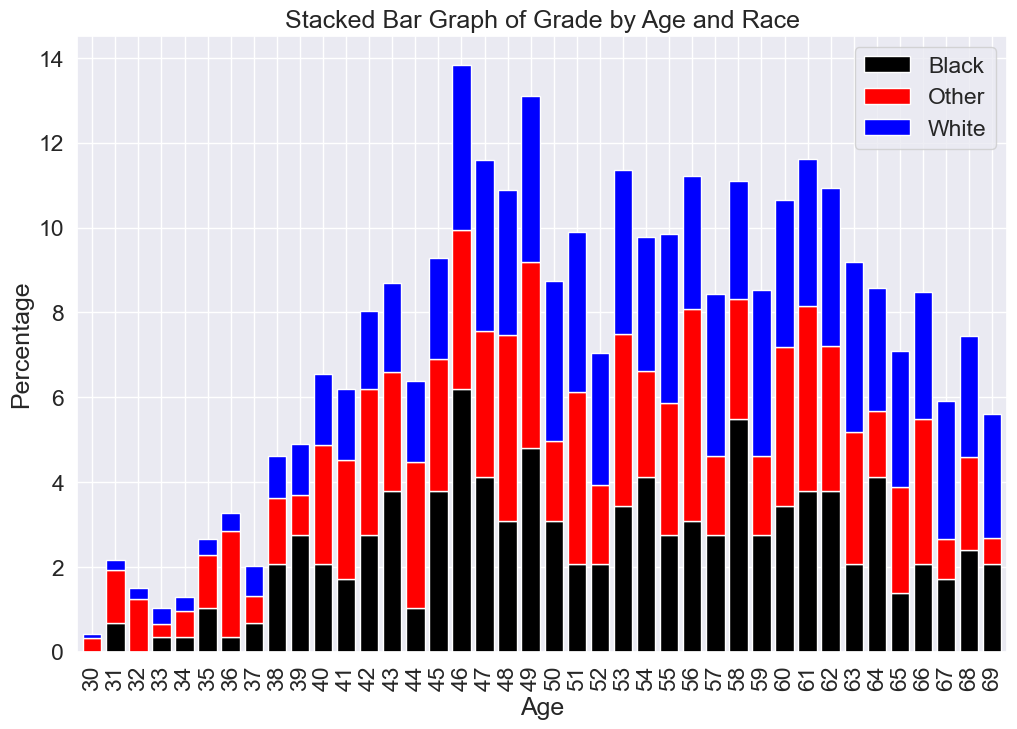

In [52]:
# Group by 'Age' and 'Race' and count the occurrences of 'Grade'
grouped_df = df.groupby(['Age', 'Race'])['Grade'].count().unstack().fillna(0)

# Calculate the relative percentages within each age group
relative_percentages = grouped_df.apply(lambda x: 100 * x / x.sum())

# Set the width and colors for the bars
width = 0.8  # Adjust the width as desired
colors = ['black', 'red', 'blue']

# Plot the stacked bar graph
ax = relative_percentages.plot.bar(stacked=True, color=colors, width=width)

# Set the style and labels for the plot
plt.rcParams['figure.figsize'] = (12, 8)  # Adjust the figure size as desired
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Stacked Bar Graph of Grade by Age and Race')
plt.legend(loc='upper right')

plt.show()

<span style="color:green"> Before our analysis we reaerch about the distribution of the disease in women by ages. we expected to have a greater precenatge of older women in the blakc community and greater precantge of young white females. our data tells us diffrently. our  client might gave us data which is not representive.</b> </span>

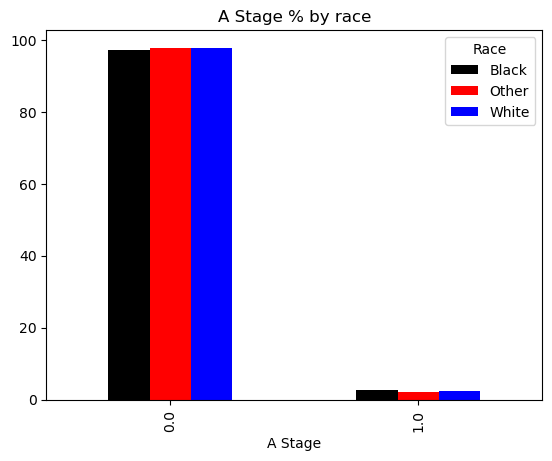

In [ ]:
df.groupby(['A Stage','Race'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar(color = ('black','red',"blue"))
plt.title(label='A Stage % by race', fontsize=12)
plt.show()

# marital status and a stage and Grade

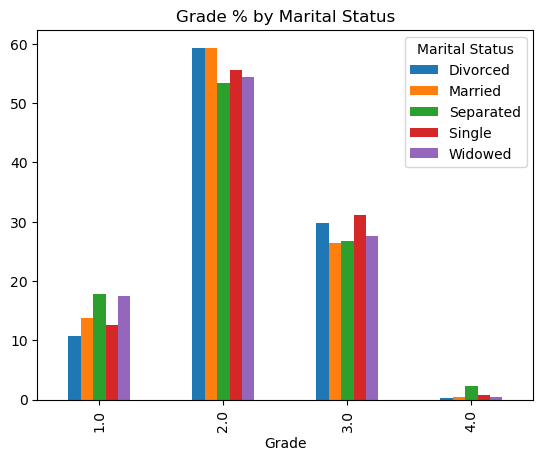

In [ ]:
df.groupby(['Grade','Marital Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar()
plt.title(label='Grade % by Marital Status', fontsize=12)
plt.show()

<span style="color:green"> Overall It seems that a married womwn are not less likely to develop a higher grade of breast cancer. after our research, it has mention in the literature that like most of illness a support system is alway a good idea. we do see a spike of single women in the 3rd stage. </b> </span>

link to the article: https://www.sciencedirect.com/science/article/abs/pii/S0960977616302685

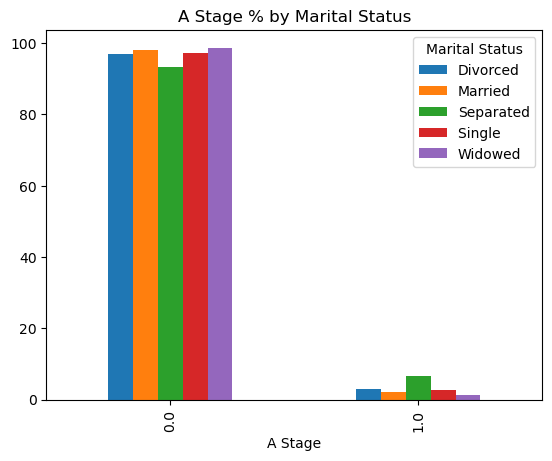

In [ ]:
df.groupby(['A Stage','Marital Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).plot.bar()
plt.title(label='A Stage % by Marital Status', fontsize=12)
plt.show()

In [ ]:
df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T

Grade,1.0,2.0,3.0,4.0
6th Stage,,,,
0.0,19.080460,61.379310,19.233716,0.306513
1.0,13.362832,58.672566,27.787611,0.176991
2.0,9.714286,59.523810,30.000000,0.761905
3.0,11.940299,52.238806,35.820896,0.000000
4.0,6.991525,48.093220,43.855932,1.059322


Text(0.5, 1.0, 'corr with Grade and a stage')

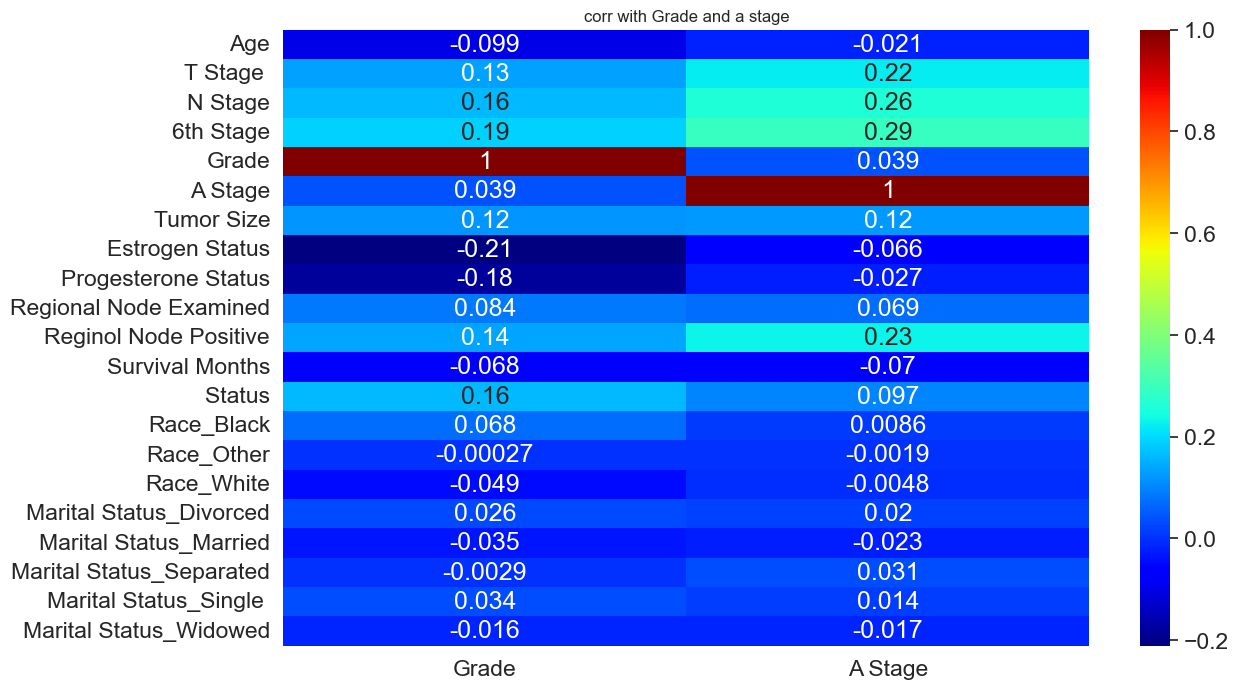

In [ ]:

fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.corr()[['Grade','A Stage']], cmap='jet',annot=True)
plt.title(label='corr with Grade and a stage', fontsize=12)


Text(0.5, 1.0, 'Grade and 6th %, normelize by 6thstage')

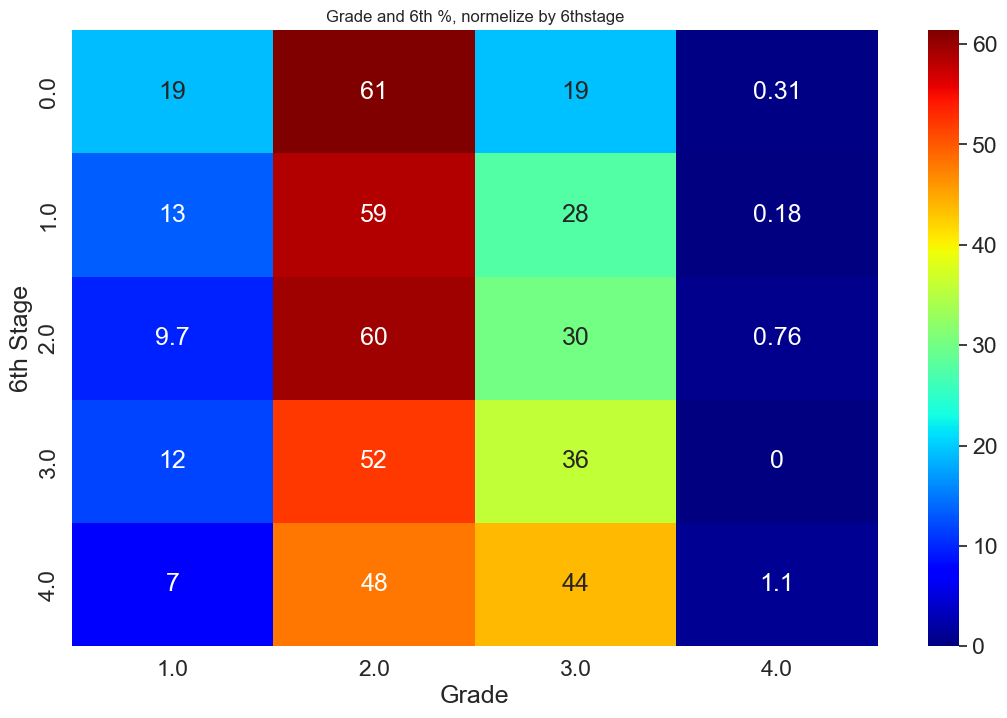

In [ ]:

fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','6th Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and 6th stage %, normelize by 6thstage', fontsize=12)


Text(0.5, 1.0, 'Grade and T stage, normelize by T stage')

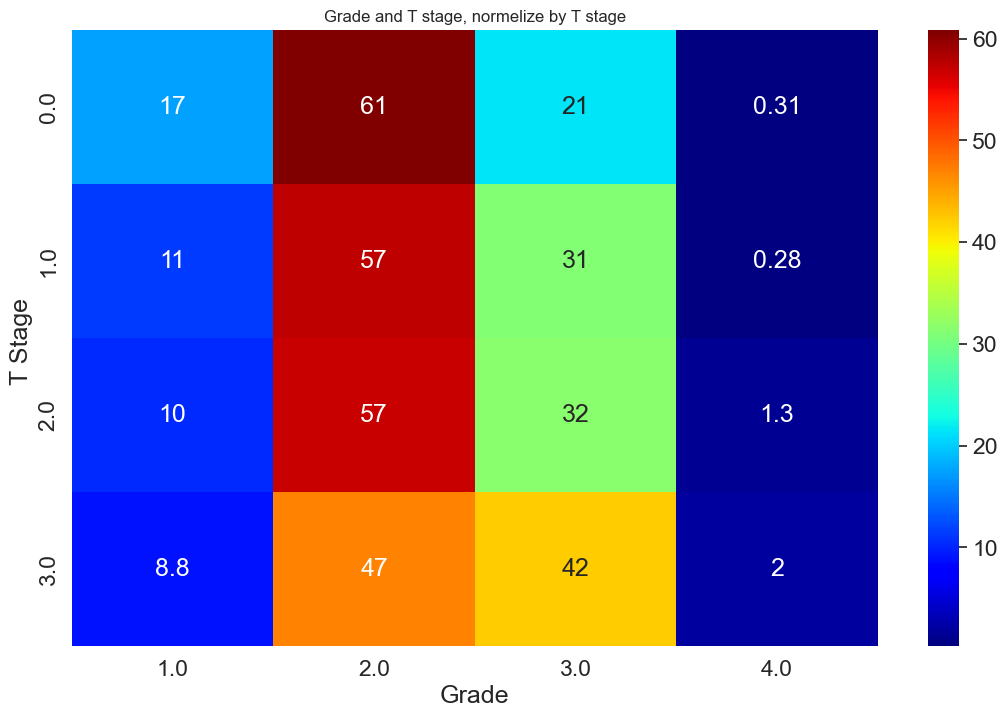

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','T Stage '])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and T stage, normelize by T stage', fontsize=12)


ניתן לראות שבשלב ת' 0 ו3 יש הבדלים משמעותיים בהתפלגות הגרייד, בפרט בחלוקה בין 2 ל3

Text(0.5, 1.0, 'Grade and N stage, normelize by N stage')

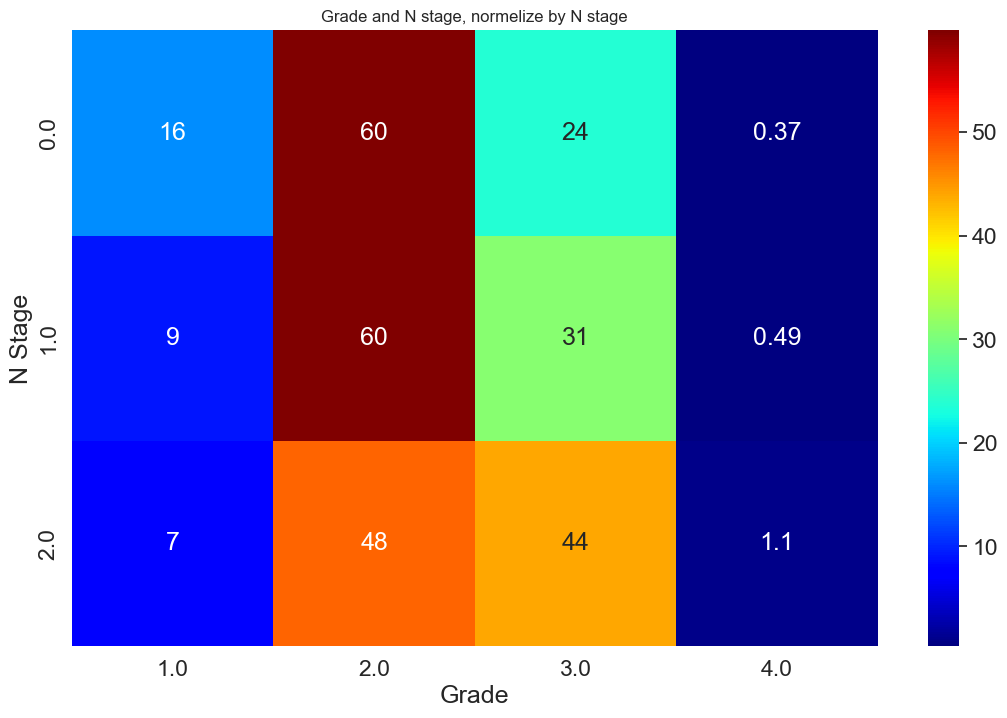

In [ ]:
fig, ax = plt.subplots(figsize=(13, 8))
sns.heatmap(ax=ax, data=df.groupby(['Grade','N Stage'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))).T, cmap='jet',annot=True)
plt.title(label='Grade and N stage, normelize by N stage', fontsize=12)


## Estrogen & Progresterone status 

<span style="color:green"> We adviced with medical proffesional, to understand why those features are mention. we been told that normal cells have receptors for thos hormones. the Estrogen & Progesterone indications are examine wheter or not the cell receptors are infected. <b> Therfore we would expect those features to increase as the Grade feature increases</b> </b> </span>

Text(0.5, 1.0, 'Grade and Estrogen Status, normelize by N stage')

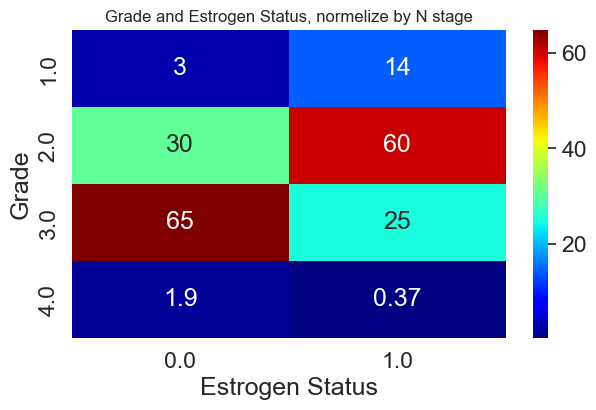

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(ax=ax, data=df.groupby(['Grade','Estrogen Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))), cmap='jet',annot=True)
plt.title(label='Grade and Estrogen Status, normelize by N stage', fontsize=12)



Text(0.5, 1.0, 'Grade and Progesterone Status, normelize by N stage')

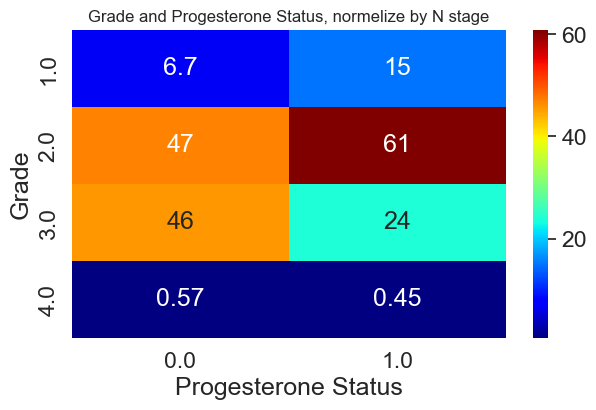

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(ax=ax, data=df.groupby(['Grade','Progesterone Status'])['Age'].count().unstack().fillna(0).transform(lambda x: (100*x/sum(x))), cmap='jet',annot=True)
plt.title(label='Grade and Progesterone Status, normelize by N stage', fontsize=12)


In [53]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Race_Black',
       'Race_Other', 'Race_White', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Separated',
       'Marital Status_Single ', 'Marital Status_Widowed', 'Race_Count',
       'Age_Count', 'Race_Percentage'],
      dtype='object')

## The T Stage

In [59]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.verywellhealth.com%2Fknow-your-breast-tumor-size-4114640&psig=AOvVaw3CmEZglsjej09AADwzD9j6&ust=1684946864738000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCNDHrazyi_8CFQAAAAAdAAAAABAE")

<Axes: >

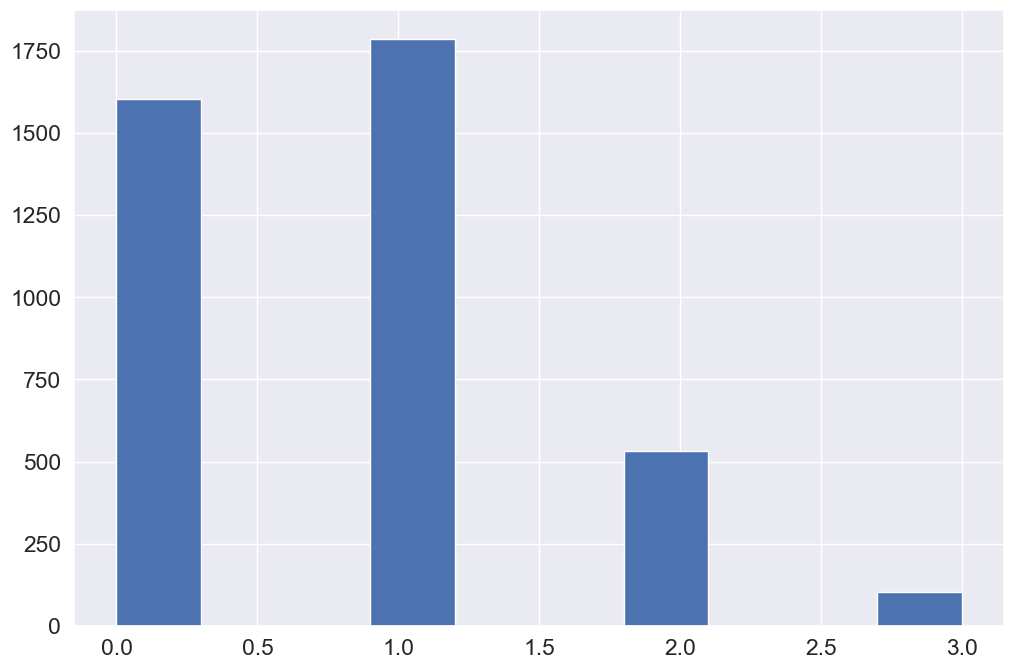

In [57]:
df['T Stage '].hist()